<a href="https://www.kaggle.com/code/tawhidulislamsazid/comprehensive-analysis-of-customer-transaction?scriptVersionId=212340101" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center>Comprehensive Analysis of Customer Transaction Data</center>

<img src="https://i.imgur.com/6Io1STX.jpeg" alt="Transaction-image">

## Business Understanding <a class="anchor" id="Business Understanding"></a>
<i>The purpose of this dataset is to find patterns in sales, customer behavior, and promotion efficacy. By examining important elements, including high-value transactions, seasonal fluctuations, the influence of discounts, and promotional performance, businesses may improve their operations and uncover high-performing tactics. Understanding these trends will enhance customer targeting, increase revenue, and promote smarter growth decision-making.</i>

## Dataset Overview <a class="anchor" id="Dataset Overview"></a>
1. <b>Transaction_ID:</b> A unique identifier for each transaction, represented as a 10-digit number. This column is used to uniquely identify each purchase. 
2. <b>Date:</b> The date and time when the transaction occurred. It records the timestamp of each purchase.
3. <b>Customer_Name:</b> The name of the customer who made the purchase. It provides information about the customer's identity.
4. <b>Total_Items:</b> The total number of items purchased in the transaction. It represents the quantity of products bought.
5. <b>Amount:</b> The total cost of the purchase, in currency dollar. It represents the financial value of the transaction.
6. <b>Payment_Method:</b> The method used for payment in the transaction, such as credit card, debit card, cash, or mobile payment.
7. <b>City:</b> The city where the purchase took place. It indicates the location of the transaction.
8. <b>Store_Type:</b> The type of store where the purchase was made, such as a supermarket, convenience store, department store, etc.
9. <b>Discount_Applied:</b> A binary indicator (True/False) representing whether a discount was applied to the transaction.
10. <b>Customer_Category:</b> A category representing the customer's background or age group.
11. <b>Season:</b> The season in which the purchase occurred, such as spring, summer, fall, or winter.
12. <b>Promotion:</b> The type of promotion applied to the transaction, such as "None," "BOGO (Buy One Get One)," or "Discount on Selected Items."

<a id = "table-of-content"></a>
## Table of Contents
1. [Business Understanding](#Business-Understanding)
2. [Dataset Overview](#Dataset-Overview)
3. [Data Cleaning & Preprocessing](#Data-Cleaning)
4. [Data Analysis](#Data-Analysis)
    - [What is the average transaction amount ($) across different store types, and how does it vary by season?](#Q1)
        - [Insights 01](#I1)
        - [Insights 02](#I2)
    - [Which payment method is most commonly used in high-value transactions (above the average transaction amount), and how does it differ across cities?](#Q2)
        - [Insights 03](#I3)
        - [Insights 04](#I4)
    - [ How do the sales amounts in transactions with discounts compare to those without discounts, and what trends can be observed over the month?](#Q3)
        - [Insights 05](#I5)
    - [What are the top three cities with the highest average number of items per transaction, and how do their sales amounts vary across seasons?](#Q4)
        - [Insights 06](#I6)
        - [Insights 07](#I7)
        - [Insights 08](#I8)
    - [How effective are different promotions in driving higher transaction amounts, and which promotion type performs best in each season?](#Q5)
        - [Insights 09](#I9)
5. [Overall Insights](#Overall-Insights)

## <center>Data Cleaning & Preprocessing<a class="anchor" id="Data Cleaning"></a></center>

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# This is our main Dataset
main_df = pd.read_csv('/kaggle/input/customer-transaction-data/transactions.csv')

In [3]:
# This is our copy Dataset. We will perform analysis on this dataset.
copy_df = main_df.copy()

In [4]:
# This is the first 5 entries of our dataset
copy_df.head()

,Transaction_ID,Date,Customer_Name,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000667075,2022-09-12 17:40:23,David King,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
1,1000156022,2022-01-20 23:03:20,Michael Williamson,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items
2,1000681674,2022-10-15 07:49:59,Chelsea Garza,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items
3,1000692089,2024-04-05 09:39:58,Scott Lopez,5,14.64,Mobile Payment,Atlanta,Pharmacy,False,Homemaker,Summer,Discount on Selected Items
4,1000328702,2021-05-28 04:16:54,Crystal Adams,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,NaN


In [5]:
# Our dataset has 38500 entries and 12 features
copy_df.shape

(38500, 12)

In [6]:
# Information of all features
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38500 entries, 0 to 38499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     38500 non-null  int64  
 1   Date               38500 non-null  object 
 2   Customer_Name      38500 non-null  object 
 3   Total_Items        38500 non-null  int64  
 4   Amount($)          38500 non-null  float64
 5   Payment_Method     38500 non-null  object 
 6   City               38500 non-null  object 
 7   Store_Type         38500 non-null  object 
 8   Discount_Applied   38500 non-null  bool   
 9   Customer_Category  38500 non-null  object 
 10  Season             38500 non-null  object 
 11  Promotion          25529 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 3.3+ MB


In [7]:
# Checking null values
copy_df.isnull().sum()

Transaction_ID           0
Date                     0
Customer_Name            0
Total_Items              0
Amount($)                0
Payment_Method           0
City                     0
Store_Type               0
Discount_Applied         0
Customer_Category        0
Season                   0
Promotion            12971
dtype: int64

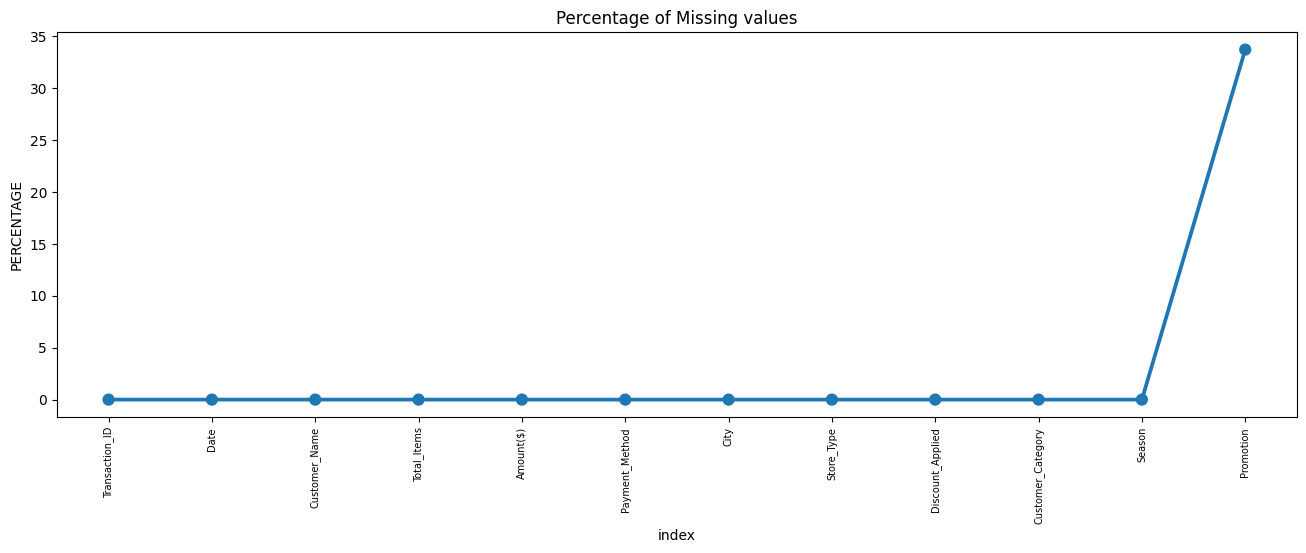

In [8]:
# Visual Representations of Checking Null Values
missing = pd.DataFrame((copy_df.isnull().sum())*100/copy_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(data = missing, x="index", y=0)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

The <b>Promotion</b> column has about <b>34%</b> missing data. Since it's important, I chose to keep it and filled the missing values with the word <b>"Unknown"</b> instead of droping the column.

In [9]:
# Imputation
copy_df['Promotion'] = copy_df['Promotion'].fillna("Unknown")
copy_df.head()

,Transaction_ID,Date,Customer_Name,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000667075,2022-09-12 17:40:23,David King,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
1,1000156022,2022-01-20 23:03:20,Michael Williamson,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items
2,1000681674,2022-10-15 07:49:59,Chelsea Garza,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items
3,1000692089,2024-04-05 09:39:58,Scott Lopez,5,14.64,Mobile Payment,Atlanta,Pharmacy,False,Homemaker,Summer,Discount on Selected Items
4,1000328702,2021-05-28 04:16:54,Crystal Adams,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,Unknown


In [10]:
# Checking null values after Imputation
copy_df.isnull().sum()

Transaction_ID       0
Date                 0
Customer_Name        0
Total_Items          0
Amount($)            0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

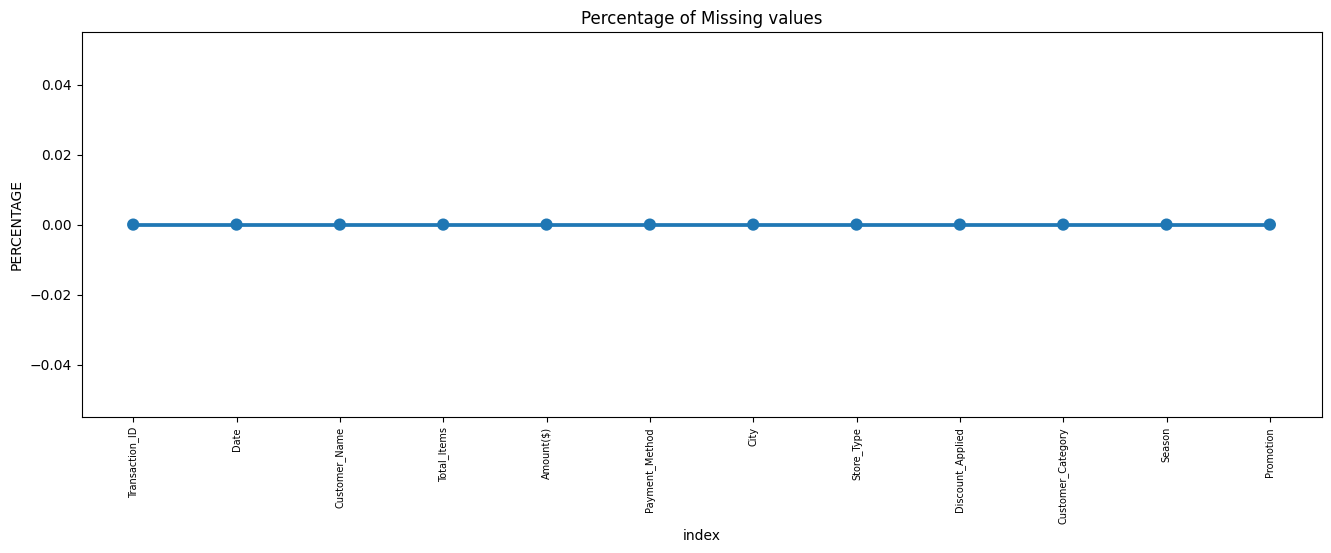

In [11]:
# Visual Representations of Null Values after Imputation
missing = pd.DataFrame((copy_df.isnull().sum())*100/copy_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(data = missing, x="index", y=0)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<b>There are no longer any missing values in any column.</b>

(array([0, 1]), [Text(0, 0, 'Total_Items'), Text(1, 0, 'Amount($)')])

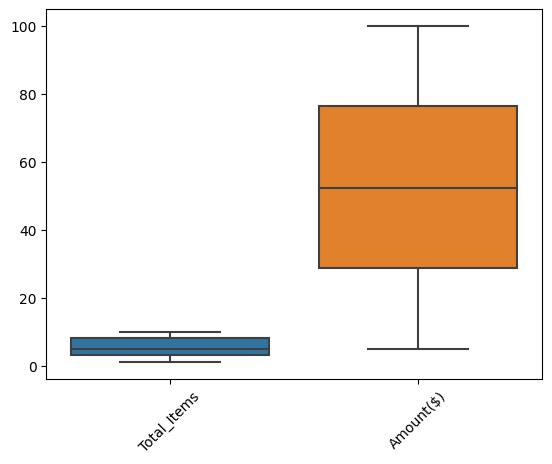

In [12]:
# Outlier Detection
outlier_df = copy_df[['Total_Items', 'Amount($)']]
sns.boxplot(data=outlier_df)
plt.xticks(rotation=45)

<b>No outliers are present in any of the numerical columns.</b>

In [13]:
# Handling Date & Time => (Fetaure Engineering Process)
copy_df['Year']=copy_df['Date'].str.split('-').str[0]
copy_df['Month']=copy_df['Date'].str.split('-').str[1]
copy_df['Day']=copy_df['Date'].str.split('-').str[2].str.split(' ').str[0]

In [14]:
copy_df.head()

,Transaction_ID,Date,Customer_Name,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year,Month,Day
0,1000667075,2022-09-12 17:40:23,David King,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One),2022,09,12
1,1000156022,2022-01-20 23:03:20,Michael Williamson,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items,2022,01,20
2,1000681674,2022-10-15 07:49:59,Chelsea Garza,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items,2022,10,15
3,1000692089,2024-04-05 09:39:58,Scott Lopez,5,14.64,Mobile Payment,Atlanta,Pharmacy,False,Homemaker,Summer,Discount on Selected Items,2024,04,05
4,1000328702,2021-05-28 04:16:54,Crystal Adams,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,Unknown,2021,05,28


In [15]:
# Dropping 'Transaction_ID', 'Date', 'Customer_Name'
# These columns do not hold any significance for our analysis.
copy_df.drop(["Transaction_ID", "Date", "Customer_Name"], axis=1, inplace=True)

In [16]:
copy_df.head()

,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year,Month,Day
0,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One),2022,09,12
1,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items,2022,01,20
2,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items,2022,10,15
3,5,14.64,Mobile Payment,Atlanta,Pharmacy,False,Homemaker,Summer,Discount on Selected Items,2024,04,05
4,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,Unknown,2021,05,28


In [17]:
# Information of all features
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38500 entries, 0 to 38499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total_Items        38500 non-null  int64  
 1   Amount($)          38500 non-null  float64
 2   Payment_Method     38500 non-null  object 
 3   City               38500 non-null  object 
 4   Store_Type         38500 non-null  object 
 5   Discount_Applied   38500 non-null  bool   
 6   Customer_Category  38500 non-null  object 
 7   Season             38500 non-null  object 
 8   Promotion          38500 non-null  object 
 9   Year               38500 non-null  object 
 10  Month              38500 non-null  object 
 11  Day                38500 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 3.3+ MB


In [18]:
# Converting data from object type to integer type.
copy_df['Year'] = pd.to_numeric(copy_df['Year'])
copy_df['Month'] = pd.to_numeric(copy_df['Month'])
copy_df['Day'] = pd.to_numeric(copy_df['Day'])

In [19]:
# Information of all features
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38500 entries, 0 to 38499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total_Items        38500 non-null  int64  
 1   Amount($)          38500 non-null  float64
 2   Payment_Method     38500 non-null  object 
 3   City               38500 non-null  object 
 4   Store_Type         38500 non-null  object 
 5   Discount_Applied   38500 non-null  bool   
 6   Customer_Category  38500 non-null  object 
 7   Season             38500 non-null  object 
 8   Promotion          38500 non-null  object 
 9   Year               38500 non-null  int64  
 10  Month              38500 non-null  int64  
 11  Day                38500 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 3.3+ MB


In [20]:
# Checking Null values again
copy_df.isnull().sum()

Total_Items          0
Amount($)            0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
Year                 0
Month                0
Day                  0
dtype: int64

In [21]:
# Top 5 entries of our dataset after cleaning and preprocessing
copy_df.head()

,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year,Month,Day
0,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One),2022,9,12
1,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items,2022,1,20
2,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items,2022,10,15
3,5,14.64,Mobile Payment,Atlanta,Pharmacy,False,Homemaker,Summer,Discount on Selected Items,2024,4,5
4,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,Unknown,2021,5,28


Data Cleaning and Processing part is completed.

## <center>Data Analysis<a class="anchor" id="Data Analysis"></a></center>

### 1. What is the average transaction amount ($) across different store types, and how does it vary by season?<a class="anchor" id="Q1"></a>

In [22]:
# Colors for visualization
color = ["#00876c", "#6b9c72", "#a3b088", "#cec6ad", "#cda376", "#d37755", "#d43d51"]

In [23]:
# Calculating the average transaction amount ($) across different store types
avg_tran_by_store_df = copy_df.groupby(['Store_Type'])['Amount($)'].mean().reset_index()
avg_tran_by_store_df.rename(columns={'Amount($)': 'Avg_Amount($)'}, inplace=True)
avg_tran_by_store_df

,Store_Type,Avg_Amount($)
0,Convenience Store,52.845181
1,Department Store,52.332447
2,Pharmacy,52.526439
3,Specialty Store,52.688152
4,Supermarket,52.254317
5,Warehouse Club,52.109283


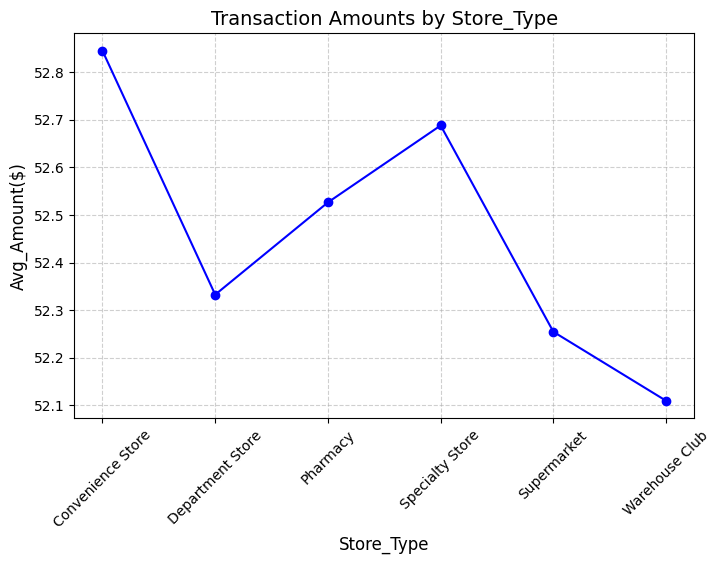

In [24]:
# Visualization (line chart)
plt.figure(figsize=(8, 5))
plt.plot(avg_tran_by_store_df['Store_Type'], avg_tran_by_store_df['Avg_Amount($)'], marker='o', linestyle='-', color='blue')

# Adding labels and title
plt.title('Transaction Amounts by Store_Type', fontsize=14)
plt.xlabel('Store_Type', fontsize=12)
plt.ylabel('Avg_Amount($)', fontsize=12)
plt.xticks(rotation =45,fontsize =10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

#### Insights 01<a class="anchor" id="I1"></a>
<i>The average transaction amount varies slightly across store types:</i><br>
    1. <b>Convenience Store: \\$52.85</b><br>
    2. <b>Department Store: \\$52.33</b><br>
    3. <b>Pharmacy: \\$52.52</b><br>
    4. <b>Specialty Store: \\$52.69</b><br>
    5. <b>Supermarket: \\$52.25</b><br>
    6. <b>Warehouse Club: \\$52.11</b>

In [25]:
# Group by Store_Type and Season, then calculate the average transaction amount
avg_tran_by_season_df = copy_df.groupby(['Store_Type', 'Season'])['Amount($)'].mean().reset_index()
avg_tran_by_season_df.rename(columns={'Amount($)': 'Avg_Amount($)'}, inplace=True)
avg_tran_by_season_df.head()

,Store_Type,Season,Avg_Amount($)
0,Convenience Store,Fall,52.872504
1,Convenience Store,Spring,53.537230
2,Convenience Store,Summer,53.345305
3,Convenience Store,Winter,51.595034
4,Department Store,Fall,51.384757


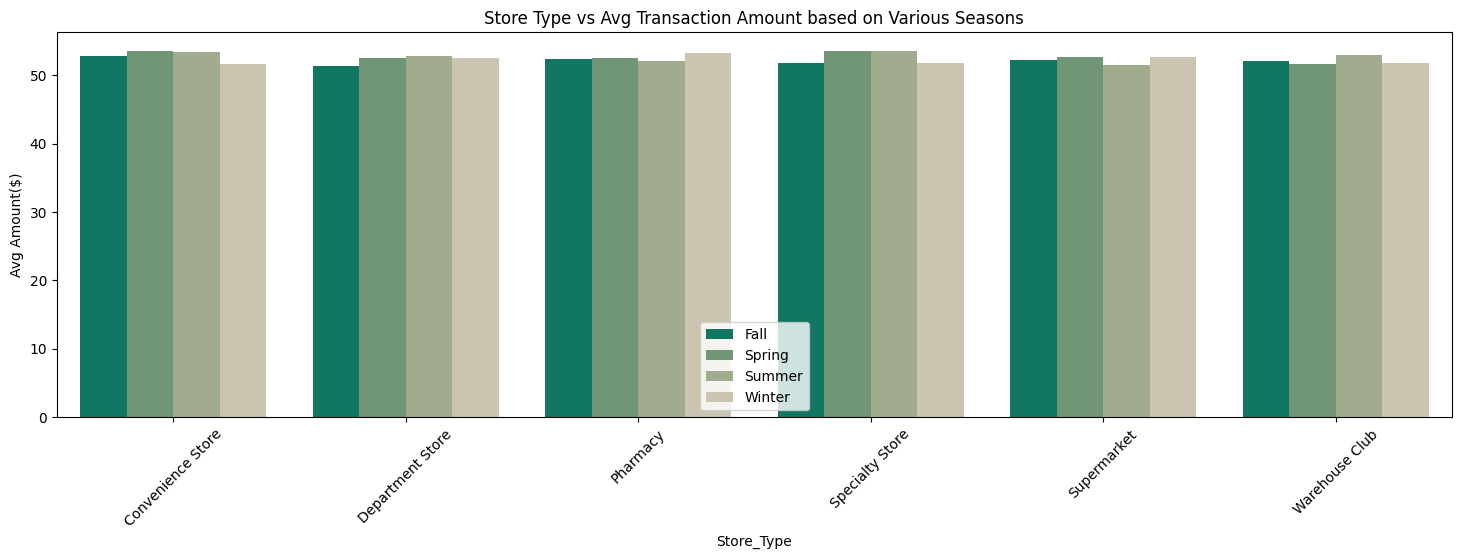

In [26]:
# Visualization using Barchart
plt.figure(figsize=(18,5))
ax = sns.barplot(data=avg_tran_by_season_df, x="Store_Type", y="Avg_Amount($)", hue='Season', palette = color)
plt.xticks(rotation =45,fontsize =10)
plt.title("Store Type vs Avg Transaction Amount based on Various Seasons")
plt.ylabel("Avg Amount($)")
plt.legend(loc='lower center')
plt.show()

#### Insights 02<a class="anchor" id="I2"></a>
<b>Convenience Store:</b>
1. The average transaction ranges from <b>51 to 53</b> and doesn't vary much across seasons.
2. The <b>lowest</b> average transaction occurs in the <b>Winter</b> season.

<b>Departmental Store:<b>
1. The average transaction is between <b>51 to 53</b> and doesn't vary much across seasons.
2. The <b>lowest</b> average transaction occurs in the <b>Fall</b> season.

<b>Pharmacy:</b>
1. The average transaction ranges from <b>52 to 54</b> and doesn't vary much across seasons.
2. The <b>highest</b> average transaction occurs in the <b>Winter</b> season.

<b>Speciality Store:</b>
1. The average transaction ranges from <b>52 to 54</b> and doesn't vary much across seasons.
2. The <b>highest</b> average transactions are seen in the <b>Spring</b> and <b>Summer</b>.

<b>Supermarket:</b>
1. The average transaction is between <b>51 to 53</b> and doesn't vary much across seasons.
2. The <b>highest</b> average transactions are seen in the <b>Spring</b> and <b>Winter</b>.

<b>Warehouse Club:</b>
1. The average transaction is between <b>51 to 53</b> and doesn't vary much across seasons.
2. The <b>highest</b> average transaction occurs in the <b>Summer</b> season.

### 2. Which payment method is most commonly used in high-value transactions (above the average transaction amount), and how does it differ across cities?<a class="anchor" id="Q2"></a>

In [27]:
# Determining which payment method is most commonly used in high-value transactions
# Calculating the average transaction amount
average_transaction = copy_df['Amount($)'].mean()

# Filtering high-value transactions
high_value_transactions = copy_df[copy_df['Amount($)'] > average_transaction]

# Analyzing the most common payment method 
payment_tran_df = high_value_transactions.groupby(['Payment_Method'])['Amount($)'].sum().reset_index()

# Sorting
sorted_payment_tran_df = payment_tran_df.sort_values(by='Amount($)', ascending=False)

# Print
sorted_payment_tran_df

,Payment_Method,Amount($)
2,Debit Card,374306.02
0,Cash,366750.38
1,Credit Card,364423.12
3,Mobile Payment,359191.41


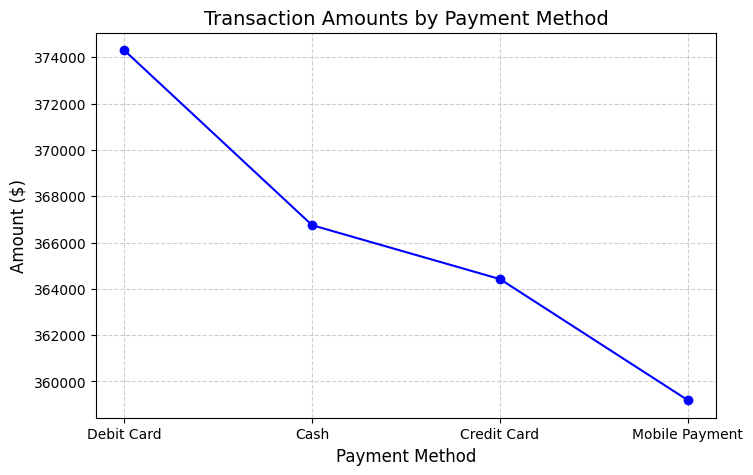

In [28]:
# Visualization (line chart)
plt.figure(figsize=(8, 5))
plt.plot(sorted_payment_tran_df['Payment_Method'], sorted_payment_tran_df['Amount($)'], marker='o', linestyle='-', color='blue')

# Adding labels and title
plt.title('Transaction Amounts by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

#### Insight 03<a class="anchor" id="I3"></a>
The most commonly used payment method in high value transaction is <b>Debit Card</b>.

In [29]:
# Analyzing most common payment method by city
payment_city_analysis = high_value_transactions.groupby(['City', 'Payment_Method']).size().unstack()

# Printing the table
payment_city_analysis

Payment_Method,Cash,Credit Card,Debit Card,Mobile Payment
City,,,,
Atlanta,467,452,451,506
Boston,485,471,484,427
Chicago,516,507,484,455
Dallas,454,466,538,422
Houston,492,484,492,462
Los Angeles,485,453,518,492
Miami,467,489,485,485
New York,482,480,453,510
San Francisco,489,504,483,490


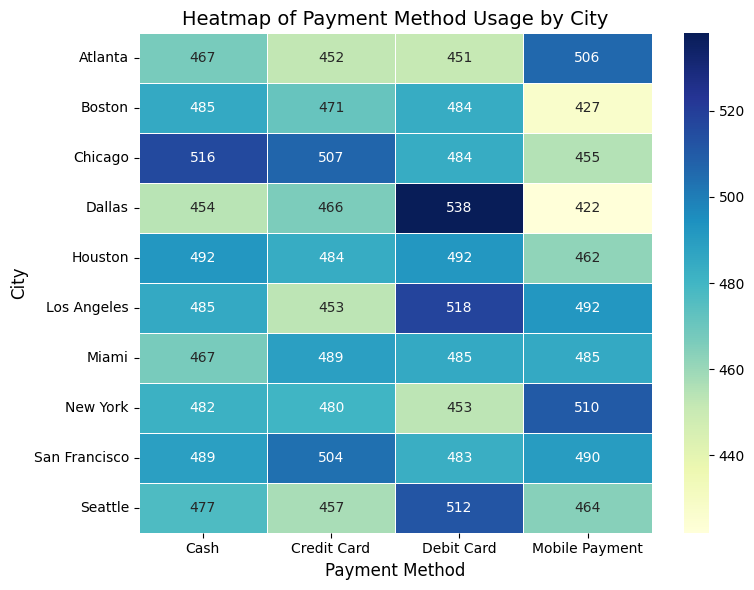

In [30]:
# Visualization using a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(payment_city_analysis, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

# Add labels and title
plt.title('Heatmap of Payment Method Usage by City', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

#### Insights 04<a class="anchor" id="I4"></a>
1. <b>Debit card</b> is highly used in <b>Dallas</b>, <b>Los Angeles</b> and <b>Seattle</b>.
2. <b>Cash</b> is highly used in <b>Boston</b>, <b>Chicago</b> and <b>Housten</b>.
3. <b>Credit Card</b> is highly used in <b>Miami</b> and <b>San Francisco</b>.
4. <b>Mobile Payment</b> is highly used in <b>Atlanta</b> and <b>New York</b>

### 3. How do the sales amounts in transactions with discounts compare to those without discounts, and what trends can be observed over the month?<a class="anchor" id="Q3"></a>

In [31]:
# Group data by Month and Discount_Applied, calculate total sales
monthly_tran_df = copy_df.groupby(['Month','Discount_Applied'])['Amount($)'].sum().reset_index()
monthly_tran_df.head()

,Month,Discount_Applied,Amount($)
0,1,False,94368.87
1,1,True,99399.06
2,2,False,88972.20
3,2,True,89528.82
4,3,False,101094.87


In [32]:
# Monthly Transaction Amount Table
monthly_tran_df_table = monthly_tran_df.pivot(index='Month', columns='Discount_Applied', values='Amount($)')
monthly_tran_df_table

Discount_Applied,False,True
Month,,
1,94368.87,99399.06
2,88972.20,89528.82
3,101094.87,104664.82
4,91498.56,94579.38
5,87319.30,88251.50
6,73160.78,76436.89
7,79872.64,79409.59
8,75079.00,80688.45
9,71797.90,75358.43


Text(0.5, 1.0, 'Monthly Sales according to Discount')

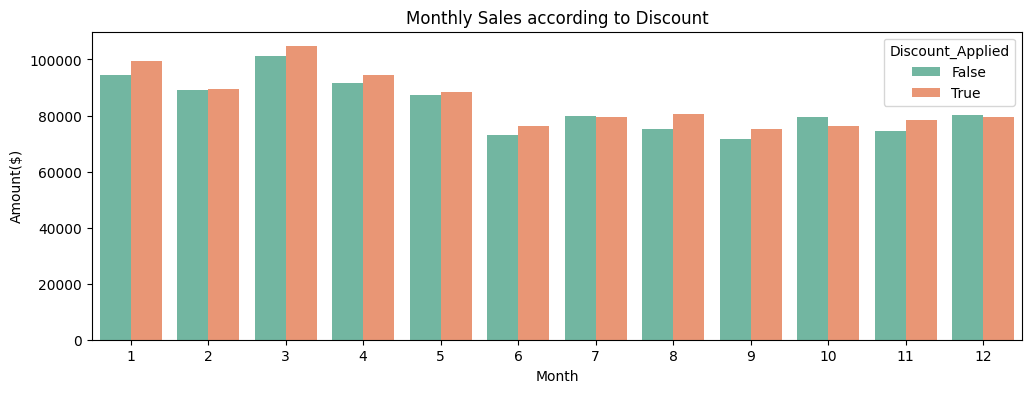

In [33]:
# Visualization using Barchart
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_tran_df, y='Amount($)', x='Month', hue='Discount_Applied', palette="Set2")
plt.title('Monthly Sales according to Discount')

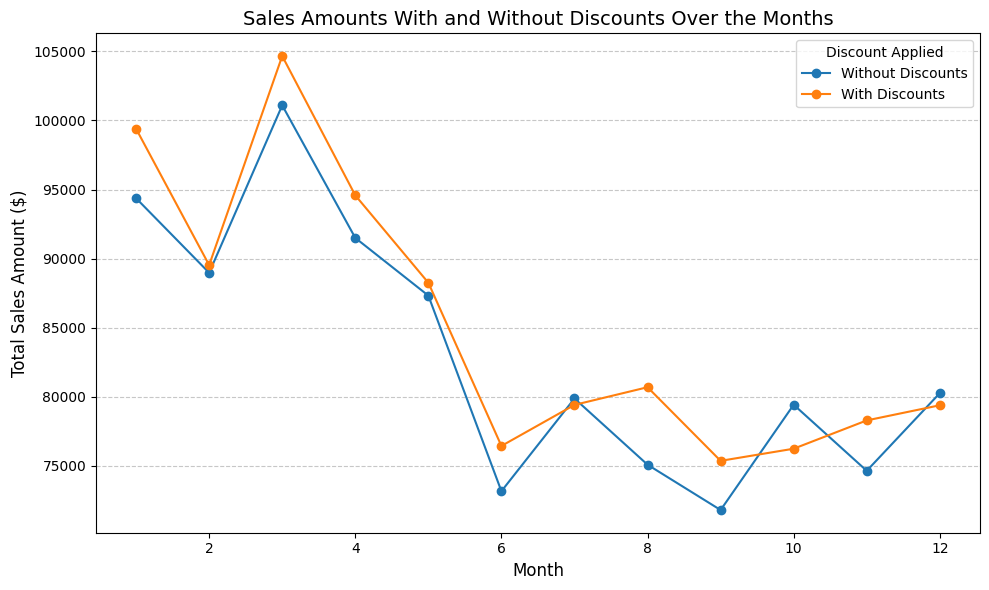

In [34]:
# Visualization using line chart
plt.figure(figsize=(10, 6))
monthly_tran_df_table.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Sales Amounts With and Without Discounts Over the Months', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.legend(['Without Discounts', 'With Discounts'], title='Discount Applied', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

#### Insights 05<a class="anchor" id="I5"></a>
1. Sales are typically higher with discounts.
2. <b>Exceptions:</b> In <b>July</b>, <b>October</b>, and <b>December</b>, sales without discounts are higher.
3. Sales are notably higher in <b>January</b> and <b>February</b> compared to other months.

### 4. What are the top three cities with the highest average number of items per transaction, and how do their sales amounts vary across seasons?<a class="anchor" id="Q4"></a>

In [35]:
# Calculating the average number of items per transaction by city
avg_items = copy_df.groupby('City')['Total_Items'].mean().sort_values(ascending=False)

# Get the top 3 cities
top_3_cities = avg_items.head(3).index
top_3_cities

Index(['Chicago', 'Houston', 'Miami'], dtype='object', name='City')

#### Insight 06<a class="anchor" id="I6"></a>
1. Top 3 cities with the highest average number of items per transaction are <b>Chicago</b>, <b>Houston</b> and <b>Miami</b>

In [36]:
# Filtering data for the top 3 cities
top_3_cities_df = copy_df[copy_df['City'].isin(top_3_cities)]

# Group by City and Season, calculate average sales amount
sales_by_season_df = top_3_cities_df.groupby(['City', 'Season'])['Amount($)'].mean().reset_index()
sales_by_season_df

,City,Season,Amount($)
0,Chicago,Fall,52.331881
1,Chicago,Spring,53.990646
2,Chicago,Summer,53.453493
3,Chicago,Winter,53.090349
4,Houston,Fall,52.965102
5,Houston,Spring,52.215140
6,Houston,Summer,52.245323
7,Houston,Winter,51.126946
8,Miami,Fall,53.052973
9,Miami,Spring,52.636293


In [37]:
# Sales by Season Table
sales_by_season_table = sales_by_season_df.pivot(index='City', columns='Season', values='Amount($)')
sales_by_season_table

Season,Fall,Spring,Summer,Winter
City,,,,
Chicago,52.331881,53.990646,53.453493,53.090349
Houston,52.965102,52.215140,52.245323,51.126946
Miami,53.052973,52.636293,51.667892,52.305387


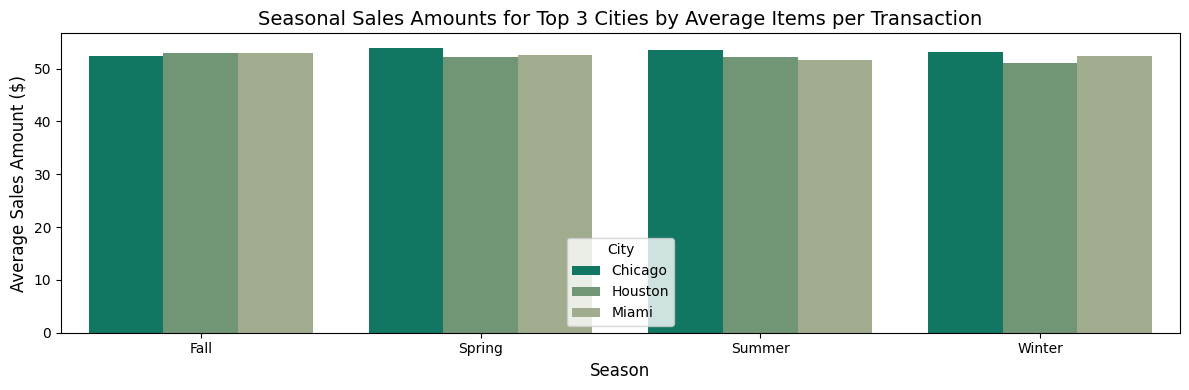

In [38]:
# Visualization using Bar Chart
plt.figure(figsize=(12, 4))
sns.barplot(data=sales_by_season_df, x='Season', y='Amount($)', hue='City', palette=color)

# Add labels and title
plt.title('Seasonal Sales Amounts for Top 3 Cities by Average Items per Transaction', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Sales Amount ($)', fontsize=12)
plt.legend(title='City', loc='lower center')
plt.tight_layout()

# Show the plot
plt.show()

#### Insights 07<a class="anchor" id="I7"></a>
1. In <b>Fall</b>, sales remain steady across cities, but <b>Chicago</b> records the lowest sales.
2. In <b>Spring</b>, <b>Summer</b>, and <b>Winter</b>, <b>Chicago</b> leads with the highest average sales.

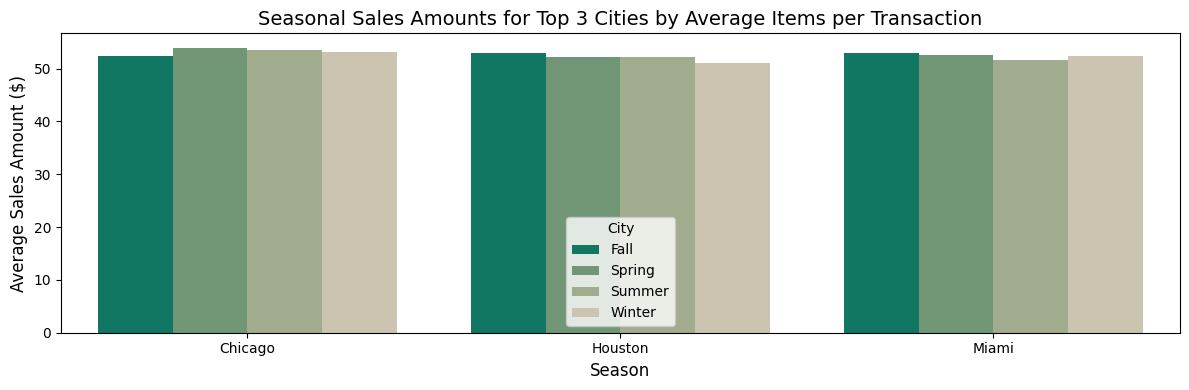

In [39]:
# Visualization using Bar Chart
plt.figure(figsize=(12, 4))
sns.barplot(data=sales_by_season_df, x='City', y='Amount($)', hue='Season', palette=color)

# Add labels and title
plt.title('Seasonal Sales Amounts for Top 3 Cities by Average Items per Transaction', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Sales Amount ($)', fontsize=12)
plt.legend(title='City', loc='lower center')
plt.tight_layout()

# Show the plot
plt.show()

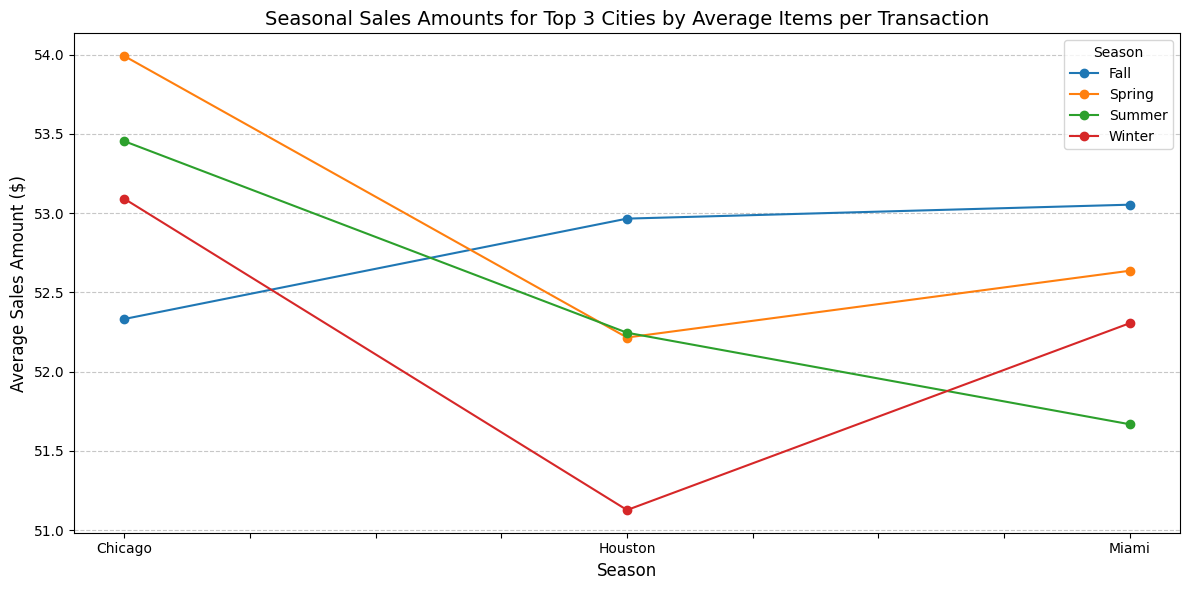

In [40]:
# Visualization using Line plot
plt.figure(figsize=(12, 6))
sales_by_season_table.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Seasonal Sales Amounts for Top 3 Cities by Average Items per Transaction', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Sales Amount ($)', fontsize=12)
plt.legend(title='Season', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

#### Insights 08<a class="anchor" id="I8"></a>
1. <b>Chicago</b> experiences its <b>highest</b> sales in the <b>Spring</b> and its <b>lowest</b> in the <b>Fall</b>.
2. <b>Houston</b> experiences its <b>highest</b> sales in the <b>Fall</b> and its <b>lowest</b> in the <b>Winter</b>.
3. <b>Miami</b> experiences its <b>highest</b> sales in the <b>Fall</b> and its <b>lowest</b> in the <b>Summer</b>.

### 5. How effective are different promotions in driving higher transaction amounts, and which promotion type performs best in each season?<a class="anchor" id="Q5"></a>

In [41]:
# Group by Promotion_Type and Season, calculate average transaction amounts
sales_by_promotion_df = copy_df.groupby(['Season', 'Promotion'])['Amount($)'].mean().reset_index()

# Pivot Table
sales_by_promotion_table = sales_by_promotion_df.pivot(index='Season', columns='Promotion', values='Amount($)')
sales_by_promotion_table

Promotion,BOGO (Buy One Get One),Discount on Selected Items,Unknown
Season,,,
Fall,52.678438,51.997053,51.755891
Spring,52.519019,53.177148,52.518695
Summer,53.271761,51.842832,52.983308
Winter,52.872204,52.012388,51.953677


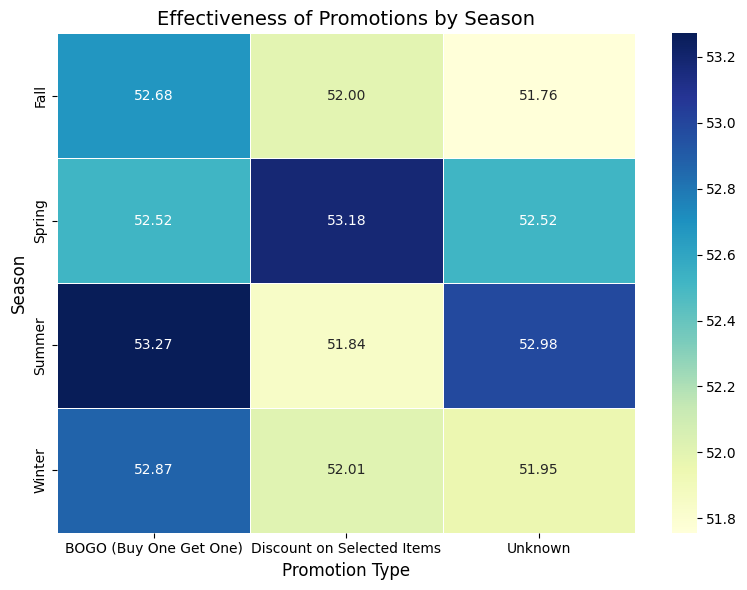

In [42]:
# Visualization using a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sales_by_promotion_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)

# Add labels and title
plt.title('Effectiveness of Promotions by Season', fontsize=14)
plt.xlabel('Promotion Type', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Season', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

#### Insights 09<a class="anchor" id="I9"></a>
1. <b>BOGO(Buy One Get One)</b> performs best in <b>Fall</b>, <b>Summer</b> and <b>Winter</b>.
2. <b>Discount on Selected Items</b> performs best in <b>Spring</b>.

## Overall Insights<a class="anchor" id="Overall Insights"></a>

1. The average transaction amount across store types ranges between \\$51 and \\$54, with slight seasonal changes.
2. <b>Debit cards</b> are the most used payment method for high-value transactions, especially in cities like <b>Dallas</b> and <b>Los Angeles.</b>
3. Payment preferences differ by city: <b>cash</b> is prominent in <b>Boston</b>, <b>Chicago</b>, and <b>Houston</b>, <b>credit cards</b> in <b>Miami</b> and <b>San Francisco</b>, and <b>mobile payments</b> in <b>Atlanta</b> and <b>New York</b>.
4. Sales are typically higher during months with discounts, except in <b>July</b>, <b>October</b>, and <b>December</b>, where sales without discounts prevail.
5. <b>January</b> and <b>February</b> record the <b>highest sales transaction amounts</b> of the year.
6. The top three cities with the <b>highest average items per transaction</b> are <b>Chicago</b>, <b>Houston</b>, and <b>Miami</b>.
7. Seasonal sales trends vary: <b>Chicago</b> peaks in <b>Spring</b>, <b>Houston</b> in <b>Fall</b>, and <b>Miami</b> in <b>Fall</b>.
8. <b>BOGO</b> promotions are <b>most effective</b> in <b>Fall</b>, <b>Summer</b>, and <b>Winter</b>, while <b>Discount on Selected Items</b> perform <b>best</b> in <b>Spring</b>.

<img src="https://i.imgur.com/DIHkOY6.jpeg" alt="Thank You">

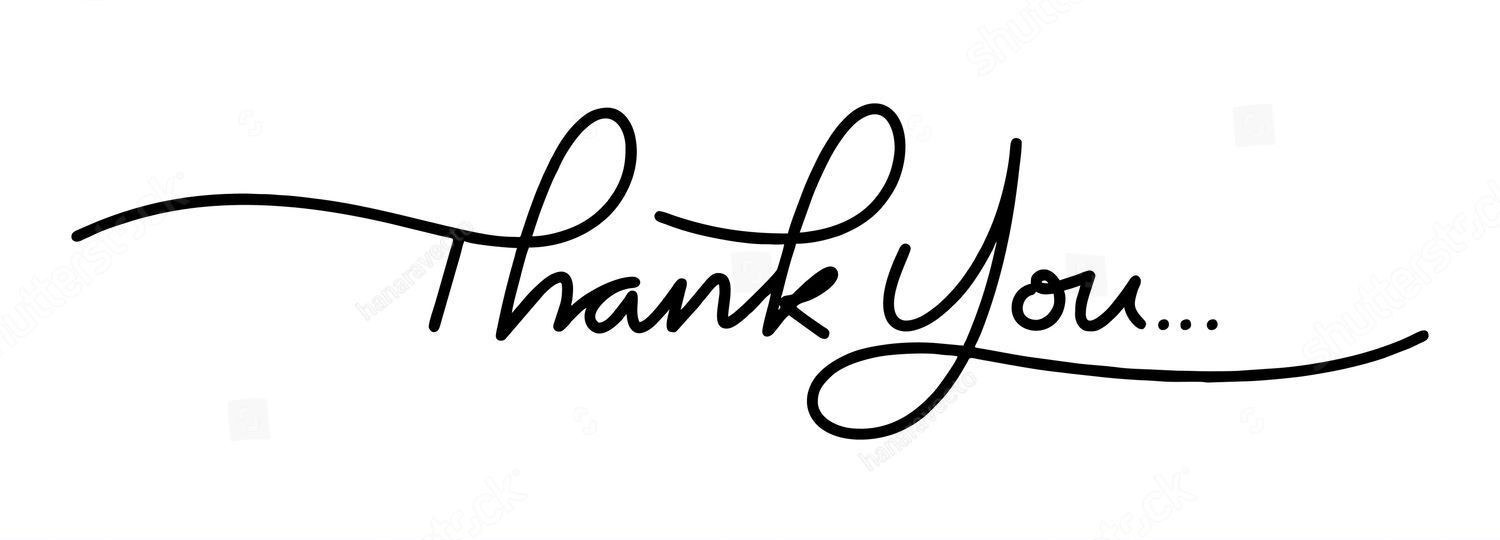